## 建立決策樹

### 讀取資料

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()

In [19]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [20]:
iris.data[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [21]:
iris.data.shape

(150, 4)

In [22]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 建立模型

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth= 2)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
import numpy as np
clf.predict(np.array([[5, 5, 3, 3]]))

array([2])

In [13]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot') 


### 使用 webgraphvis 做視覺化
- http://webgraphviz.com/

In [24]:
from sklearn import *
tree

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the function

<module 'sklearn.tree' from '/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/tree/__init__.py'>

In [28]:
import sklearn

In [27]:
from sklearn import tree

In [33]:
tree = 3
#from sklearn import tree
import sklearn
tree * 5

15

### 繪製決策邊界

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn. datasets import load_iris
from sklearn import tree

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

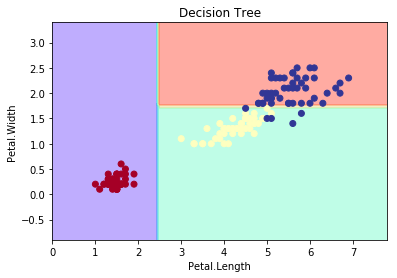

In [35]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()



## 建立邏輯式迴歸模型

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, clf.predict(iris.data))

0.96

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target, clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, clf.predict(iris.data))

0.96

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target, clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

In [51]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

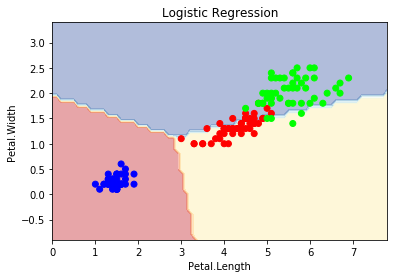

In [52]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.plot()
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()




## Activation Function

In [53]:
def threshold_function(x):
    y = x > 0
    return y.astype(int)

x = np.array([-1,1,2])
threshold_function(x)


array([0, 1, 1])

In [55]:
def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

x = np.array([-1,1,200])
sigmoid_function(x)


array([0.26894142, 0.73105858, 1.        ])

In [56]:
def tangent_function(x):
    return (1 - np.exp(-2*x)) / (1 + np.exp(-2*x))

x = np.array([-1,1,2])
tangent_function(x)


array([-0.76159416,  0.76159416,  0.96402758])

In [57]:
def relu_function(x):
    return np.maximum(0,x)

x = np.array([-1,1,2])
relu_function(x)


array([0, 1, 2])

In [58]:
import numpy as np
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X,W)
Y


array([ 5, 11, 17])

In [59]:
network = {}
network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
network['b1'] = np.array([0.1,0.2,0.3])
network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
network['b2'] = np.array([0.1,0.2])


In [60]:
x = np.array([1,0.5])
a = np.dot(x, network['w1']) + network['b1']
z = sigmoid_function(a)
y = np.dot(z, network['w2']) + network['b2']
y


array([0.51615984, 1.21402696])

In [61]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

softmax_function(y)


array([0.33228528, 0.66771472])